Import relevant libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

Load Training Data

In [2]:
# Define a transform to convert images to tensors
transform = transforms.ToTensor()

# Load the MNIST dataset
mnist_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Create a data loader to load the data in batches
data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 90581851.79it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 58491402.14it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 23293515.69it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15179704.20it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



tensor(0.) tensor(1.)


Definition of the Autoencoder with a Bottleneck layer of 392 neurons

In [3]:
# This is the definition of the Autoencoder model using a neural network with encoder and decoder modules.
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # N, 784
        self.encoder = nn.Sequential(
            nn.Linear(784, 392),
            nn.ReLU(),
            nn.Linear(392, 200)

        )

        self.decoder = nn.Sequential(
            nn.Linear(200, 392),
            nn.ReLU(),
            nn.Linear(392, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

Train the Autoencoder for n epochs

In [5]:
# These lines define the loss function (MSE loss), instantiate the Autoencoder model
# learning rate of 1e-3 and L2 regularization with a weight decay of 1e-5.
criterion = nn.MSELoss()
model = Autoencoder()
optimizer = optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-8, momentum=0.9)

# train the model over n epochs
num_epochs = 100
outputs = []
for epoch in range(num_epochs):
    for (img, _) in data_loader:
        img = img.reshape(-1, 28 * 28)
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch + 1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0622
Epoch:2, Loss:0.0537
Epoch:3, Loss:0.0483
Epoch:4, Loss:0.0320
Epoch:5, Loss:0.0316
Epoch:6, Loss:0.0215
Epoch:7, Loss:0.0231
Epoch:8, Loss:0.0240
Epoch:9, Loss:0.0228
Epoch:10, Loss:0.0195
Epoch:11, Loss:0.0194
Epoch:12, Loss:0.0186
Epoch:13, Loss:0.0154
Epoch:14, Loss:0.0151
Epoch:15, Loss:0.0165
Epoch:16, Loss:0.0136
Epoch:17, Loss:0.0140
Epoch:18, Loss:0.0137
Epoch:19, Loss:0.0121
Epoch:20, Loss:0.0145
Epoch:21, Loss:0.0125
Epoch:22, Loss:0.0122
Epoch:23, Loss:0.0114
Epoch:24, Loss:0.0112
Epoch:25, Loss:0.0120
Epoch:26, Loss:0.0106
Epoch:27, Loss:0.0097
Epoch:28, Loss:0.0100
Epoch:29, Loss:0.0099
Epoch:30, Loss:0.0109
Epoch:31, Loss:0.0100
Epoch:32, Loss:0.0095
Epoch:33, Loss:0.0078
Epoch:34, Loss:0.0104
Epoch:35, Loss:0.0091
Epoch:36, Loss:0.0090
Epoch:37, Loss:0.0094
Epoch:38, Loss:0.0087
Epoch:39, Loss:0.0091
Epoch:40, Loss:0.0078
Epoch:41, Loss:0.0090
Epoch:42, Loss:0.0080
Epoch:43, Loss:0.0088
Epoch:44, Loss:0.0079
Epoch:45, Loss:0.0091
Epoch:46, Loss:0.00

Plot the actual image and in comparison the reconstructed image after n epochs of learning

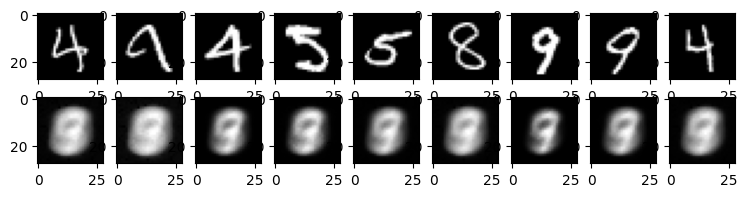

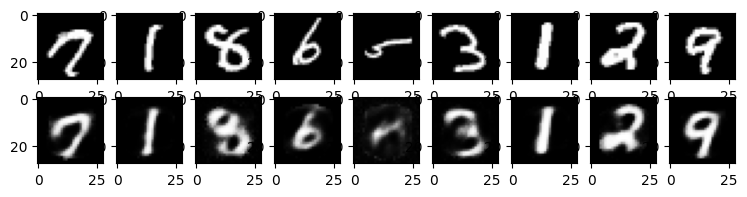

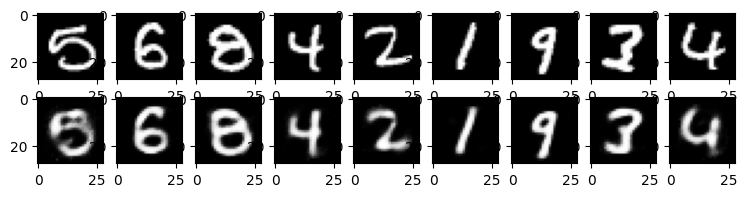

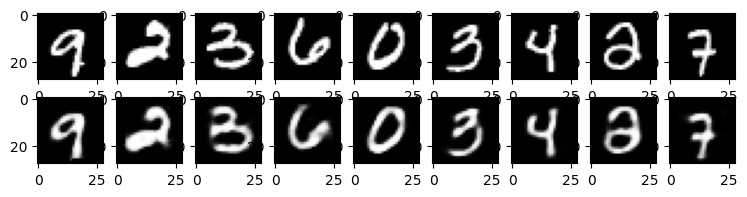

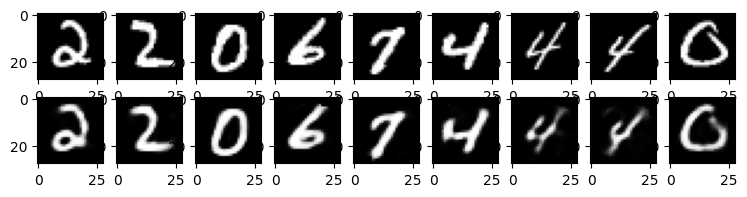

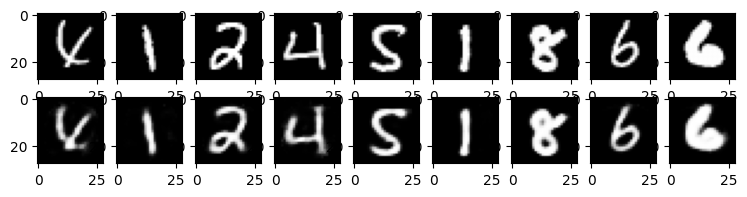

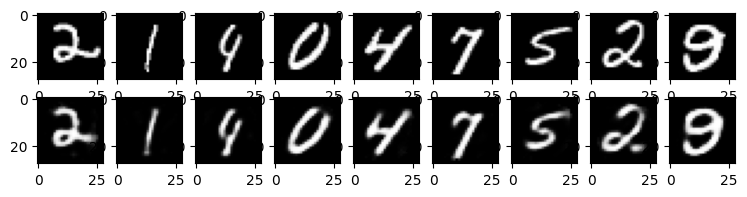

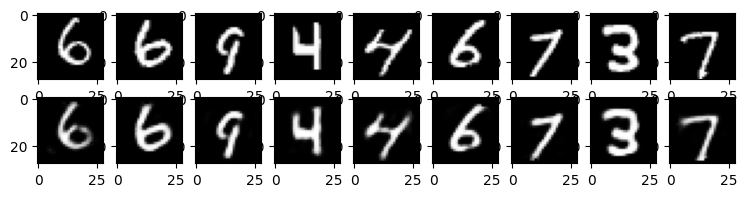

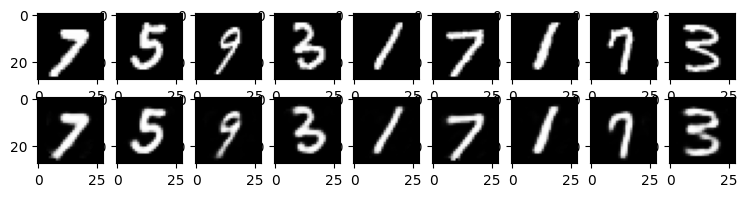

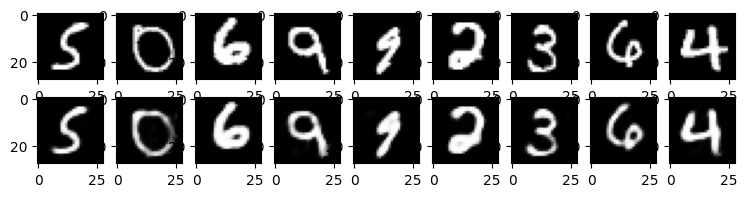

In [7]:
# Plot the resulting images
for k in range(0, num_epochs, 10):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i + 1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9 + i + 1)
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

plt.show()
